In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import missingno as msno

In [4]:
paths = {
    'nyc':'/Users/darwish/Documents/Berkeley_Offline/W210/capstone/data/pecan_street/15_min/15minute_data_newyork/15minute_data_newyork.csv',
    'austin':'/Users/darwish/Documents/Berkeley_Offline/W210/capstone/data/pecan_street/15_min/15minute_data_austin/15minute_data_austin.csv',
    'cali':'/Users/darwish/Documents/Berkeley_Offline/W210/capstone/data/pecan_street/15_min/15minute_data_california/15minute_data_california.csv'
}

In [5]:
dfs = {}
for k, f in paths.items():
    dfs[k] = pd.read_csv(f).assign(city=k)

In [6]:
combined = (
    pd.concat(dfs.values(), ignore_index=True).sort_values(['city', 'dataid', 'local_15min'])
)

In [31]:
sorted_cols = (combined.isna().mean().sort_values(ascending=True).index)

Index(['bedroom4', 'pool2', 'shed1', 'diningroom2', 'poolpump1', 'poollight1',
       'garage2', 'battery1', 'bedroom5', 'security1', 'lights_plugs5',
       'pool1', 'icemaker1', 'aquarium1', 'outsidelights_plugs2', 'air3',
       'livingroom2', 'lights_plugs6', 'car2', 'solar2', 'heater3',
       'housefan1', 'sumppump1', 'sewerpump1', 'winecooler1', 'waterheater2',
       'outsidelights_plugs1', 'kitchen2', 'oven2', 'bedroom3', 'jacuzzi1',
       'heater2', 'lights_plugs4', 'airwindowunit1', 'bathroom2',
       'refrigerator2', 'sprinkler1', 'circpump1', 'diningroom1', 'furnace2',
       'pump1', 'utilityroom1', 'air2', 'bedroom2', 'office1', 'wellpump1',
       'kitchen1', 'freezer1', 'heater1', 'lights_plugs3', 'garage1',
       'waterheater1', 'range1', 'venthood1', 'car1', 'lights_plugs2',
       'bathroom1', 'bedroom1', 'lights_plugs1', 'dryg1',
       'clotheswasher_dryg1', 'livingroom1', 'drye1', 'solar', 'kitchenapp2',
       'oven1', 'disposal1', 'clotheswasher1', 'microwav

Text(0.5, 1.0, 'Missing Data Matrix')

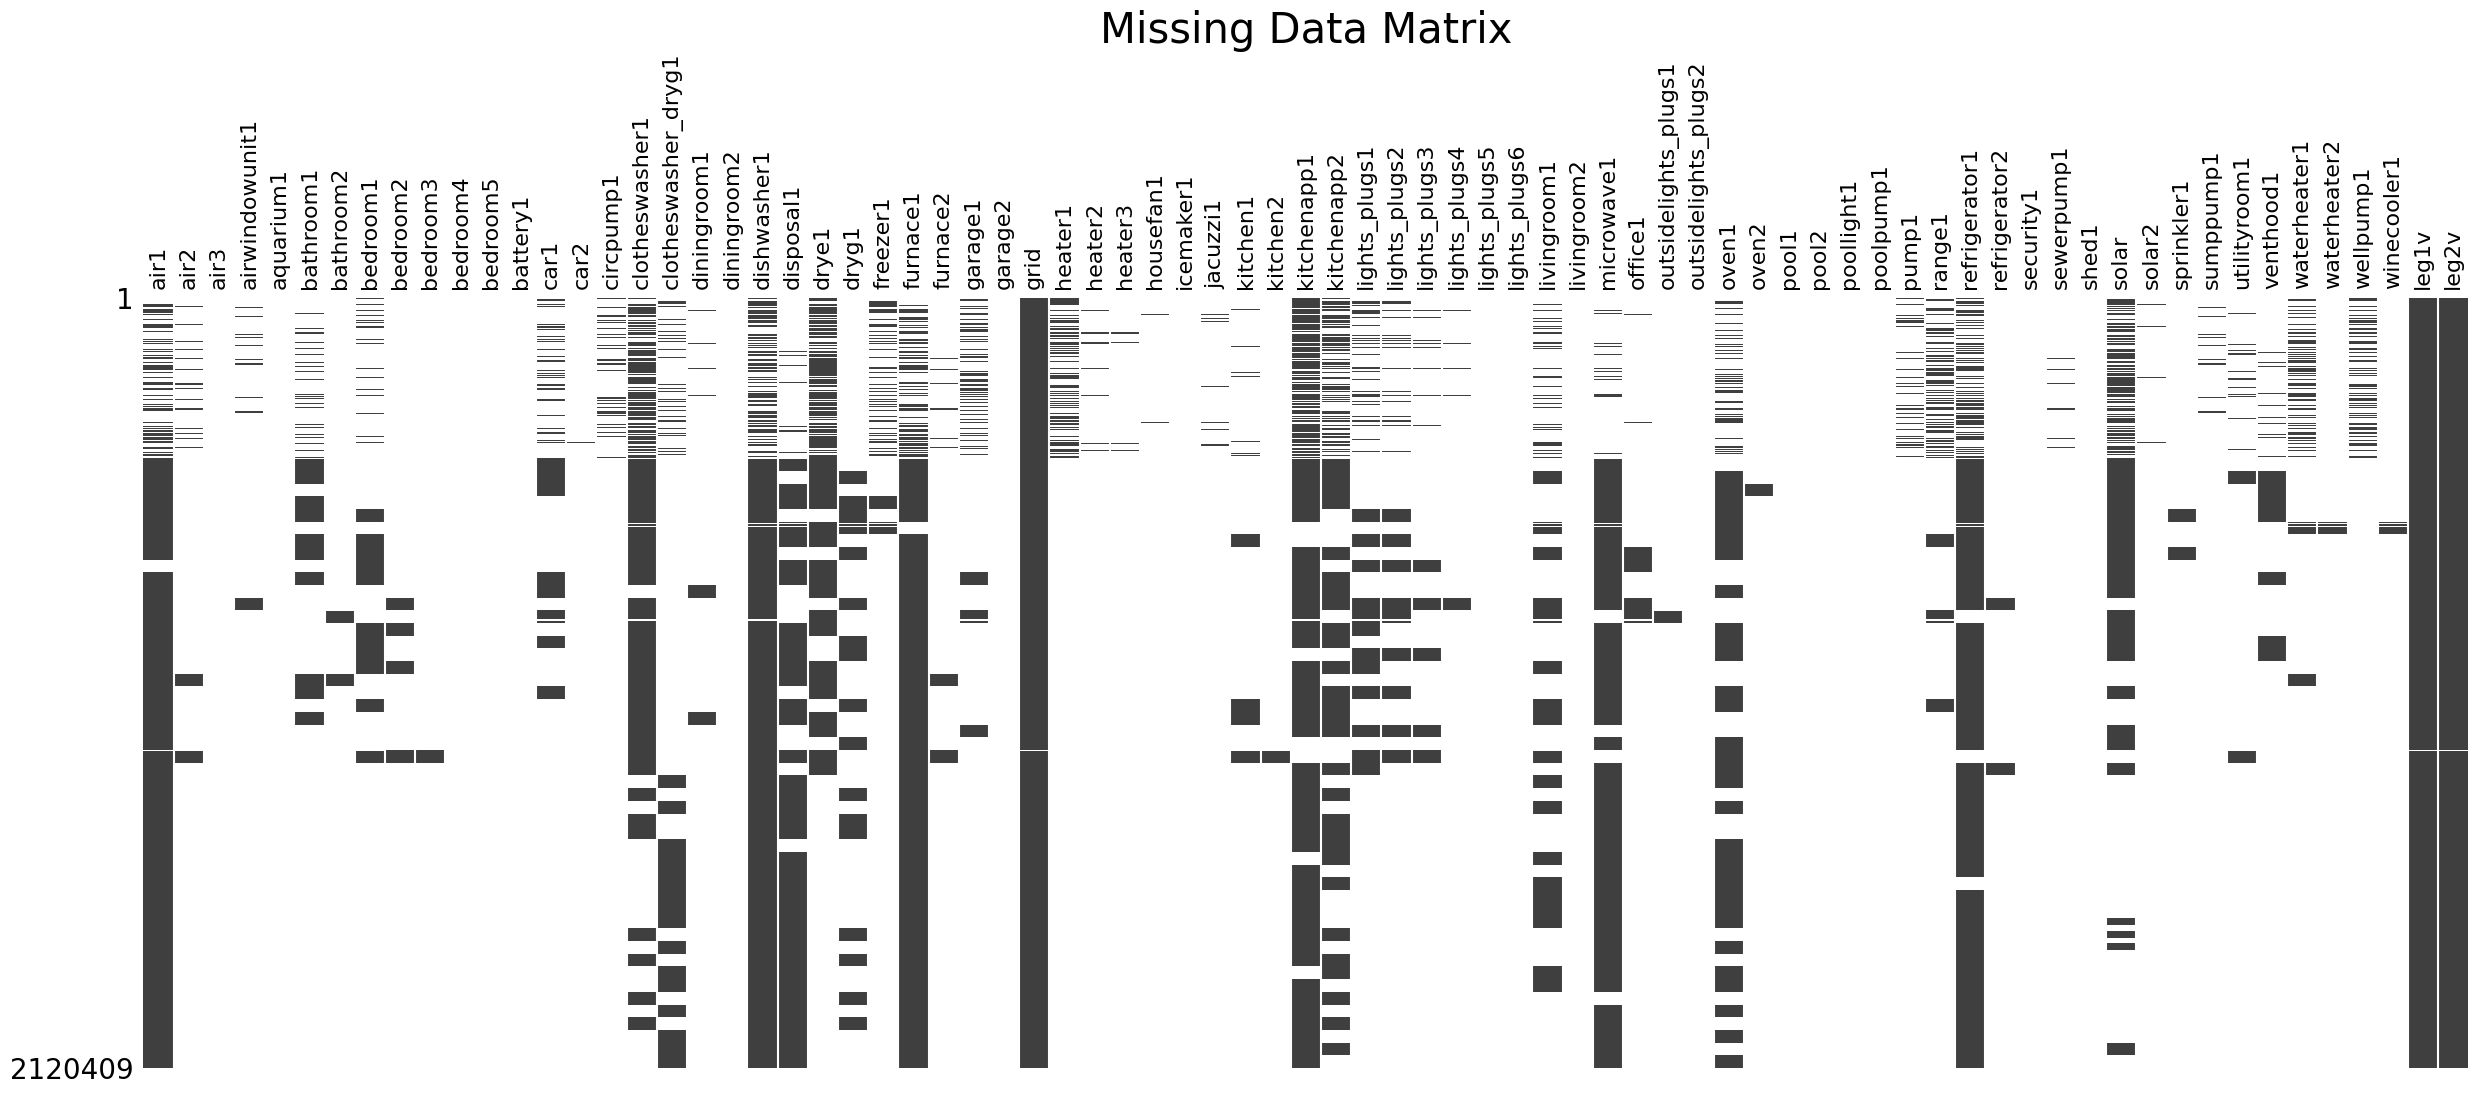

In [19]:
ax = msno.matrix(
    df=combined.drop(columns=['city', 'dataid', 'local_15min']),
    figsize=(30, 10),
    labels=True,
    sparkline=False,
)

# rotate x-axis labels
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set_title('Missing Data Matrix', fontdict={'size': 30})

In [25]:
__df = combined.drop(columns=['city', 'dataid', 'local_15min'])
((__df < 0.05) & (__df > -0.05)).mean()

air1              0.692769
air2              0.042680
air3              0.000000
airwindowunit1    0.023682
aquarium1         0.000000
                    ...   
waterheater2      0.015176
wellpump1         0.067802
winecooler1       0.005805
leg1v             0.000005
leg2v             0.000005
Length: 77, dtype: float64

In [29]:
def map_to_null(x):
    if x < 0.1:
        return np.nan
    
    return x

_df = (
    combined
    .drop(columns=['city', 'dataid', 'local_15min'])
    .map(map_to_null)
)

Text(0.5, 1.0, 'Missing Or Zero Matrix')

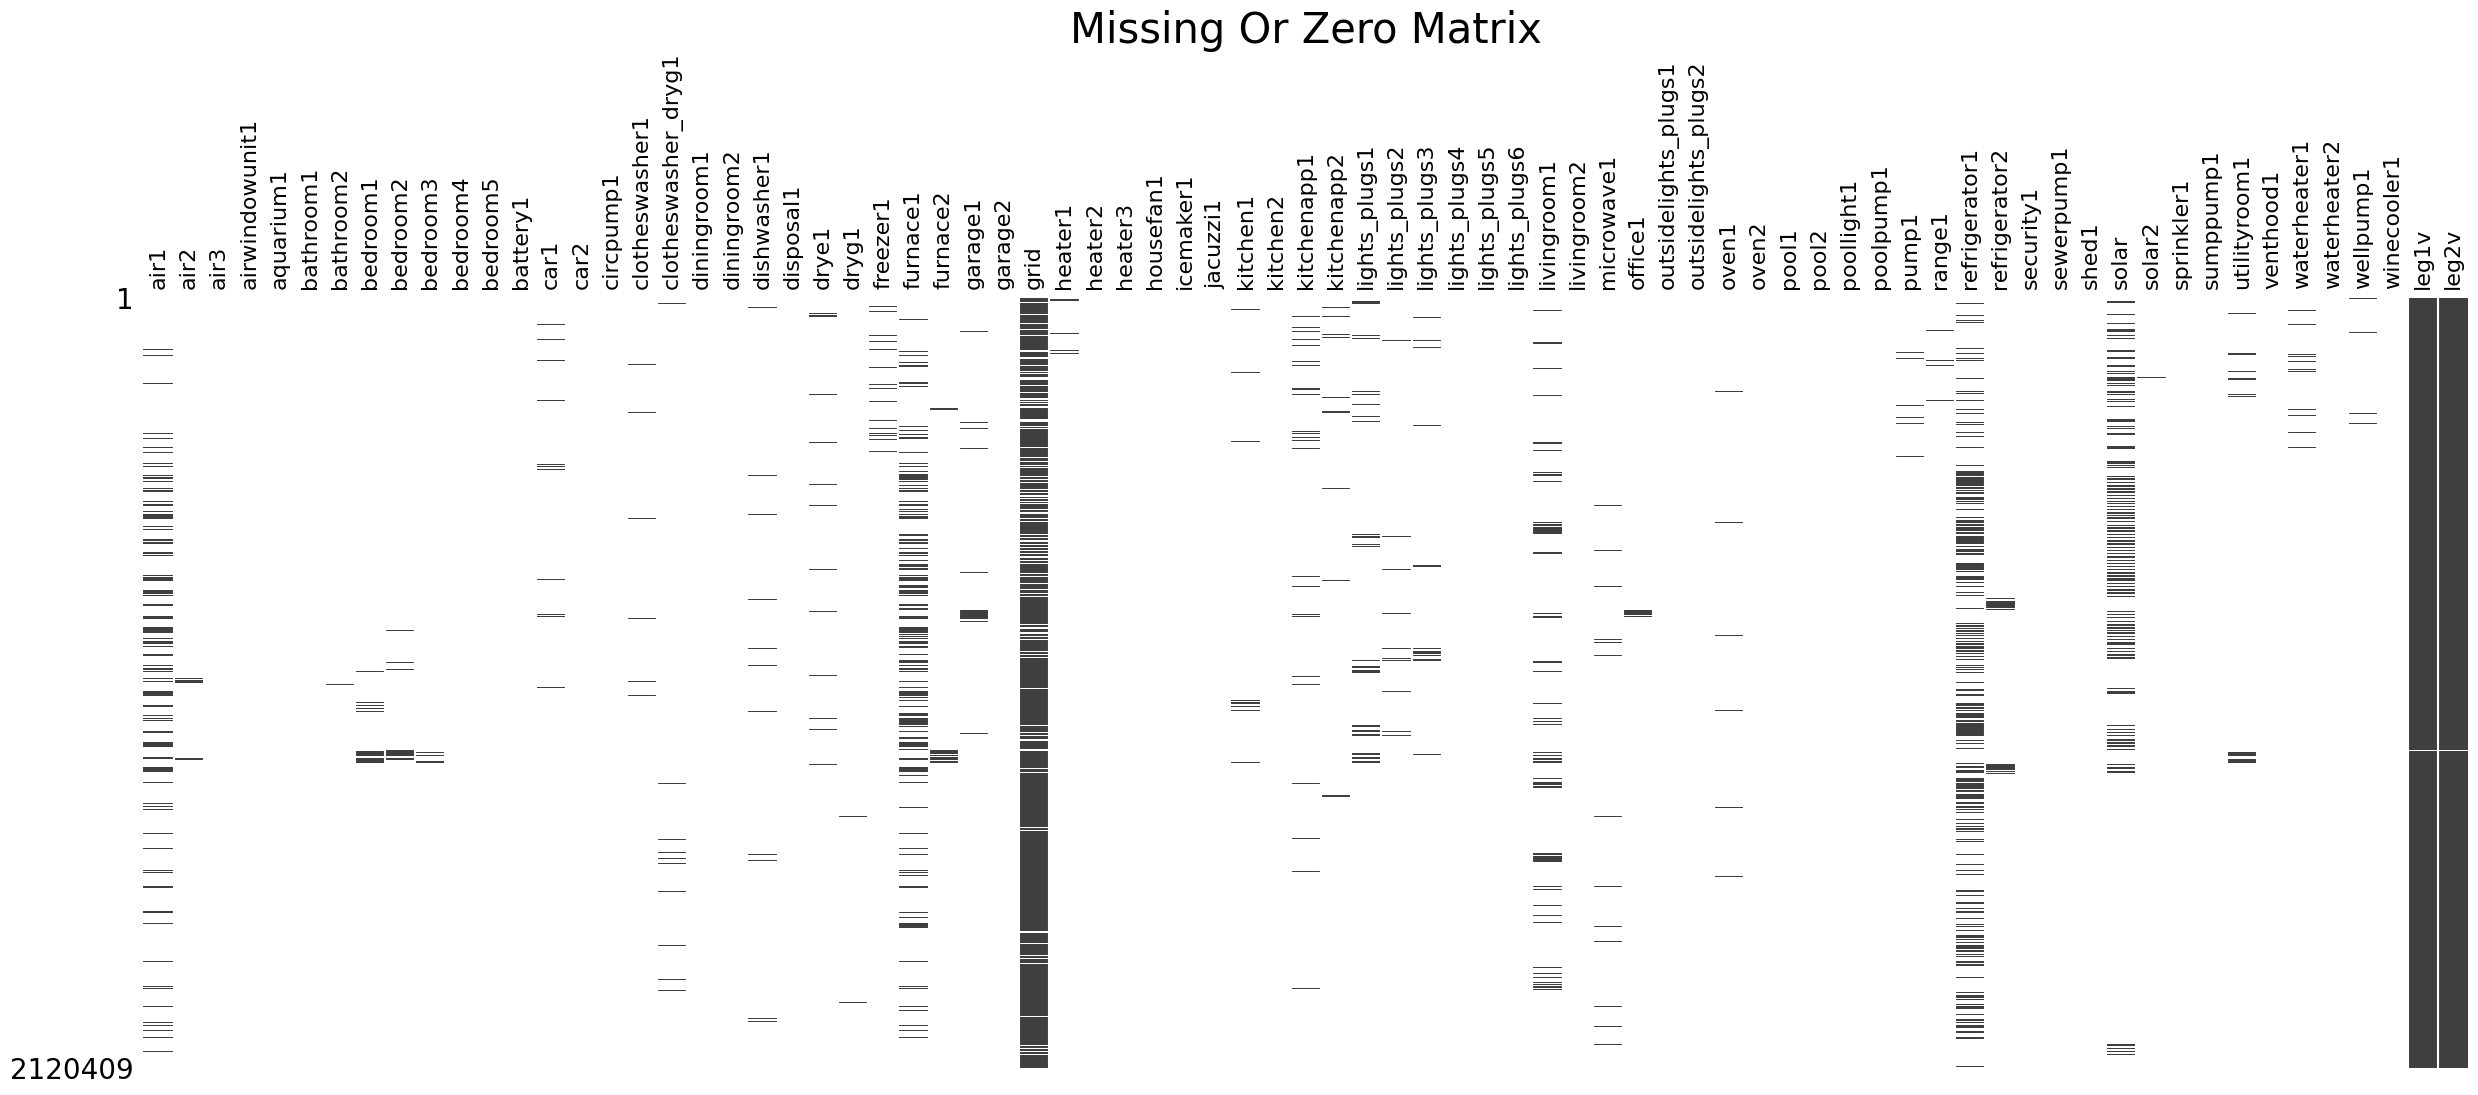

In [30]:
ax = msno.matrix(
    df=_df,
    figsize=(30, 10),
    labels=True,
    sparkline=False,
)

# rotate x-axis labels
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
ax.set_title('Missing Or Zero Matrix', fontdict={'size': 30})